In [33]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

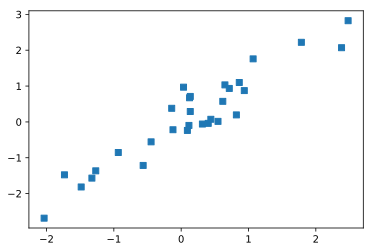

In [34]:
# creating data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [35]:
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer (number of inputs, number of outputs)
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer (number of inputs, number of outputs)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
learningrate = .05
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningrate) # Stochastic gradient descent

In [37]:
epochs = 500
losses = np.zeros(epochs)

for i in range(epochs):
    # Forward pass
    yHat = ANNreg(x)
    
    # Compute losses
    loss = lossfunction(yHat,y)
    losses[i] = loss
    
    # Back propagation
    optimizer.zero_grad() # Zero gradients
    loss.backward()
    optimizer.step()

print('Done')    

Done


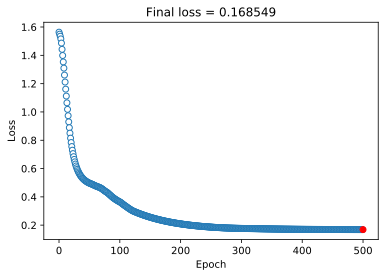

In [38]:
predictions = ANNreg(x)
testlosses = (predictions-y).pow(2).mean()
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs,testlosses.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testlosses.item())
plt.show()

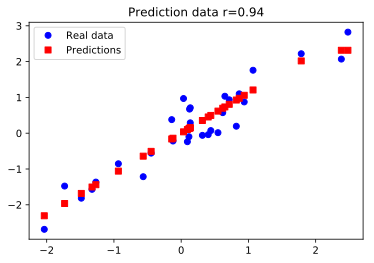

In [39]:
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label="Predictions")
plt.title(f'Prediction data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()